In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_path = '../../data/whisper-small-runs.csv'
df = pd.read_csv(df_path)
df.head()

,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,epoch
0,0,eval/tira_eval-en+sw_cer,0.511096,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,0
1,1341,eval/tira_eval-en+sw_cer,0.736247,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,1
2,2682,eval/tira_eval-en+sw_cer,0.692670,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,2
3,4023,eval/tira_eval-en+sw_cer,0.765299,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,3
4,5364,eval/tira_eval-en+sw_cer,0.819973,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,4


In [4]:
df['experiment_name'].unique()

array(['whisper-small-tira', 'whisper-small-tira-all',
       'whisper-small-tira-all-clean-lid-alpha-0.2',
       'whisper-small-tira-all-ewc-lambda-1',
       'whisper-small-tira-all-lid-alpha-0.2',
       'whisper-small-tira-all-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng-cs',
       'whisper-small-tira-eng-cs-20-80-large',
       'whisper-small-tira-eng-cs-20-80-large-ewc-lambda-1',
       'whisper-small-tira-eng-cs-20-80-large-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-20-80-small',
       'whisper-small-tira-eng-cs-20-80-small-ewc-lambda-1',
       'whisper-small-tira-eng-cs-20-80-small-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-50-50',
       'whisper-small-tira-eng-cs-50-50-ewc-lambda-1',
       'whisper-small-tira-eng-cs-50-50-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-clean',
       'whisper-small-tira-eng-cs-clean-ewc-lambda-1',
       'whisper-small-tira-eng-cs-clean-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-ewc-lambda-1',
      

In [5]:
# get more detailed colnames
get_metric = lambda s: 'cer' if s.endswith('cer') else 'wer' if s.endswith('wer') else ''
df['metric']=df['tag'].apply(get_metric)
df['metric'].value_counts()

metric
       8917
cer    1434
wer    1434
Name: count, dtype: int64

In [6]:
df

,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,epoch,metric
0,0,eval/tira_eval-en+sw_cer,0.511096,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,0,cer
1,1341,eval/tira_eval-en+sw_cer,0.736247,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,1,cer
2,2682,eval/tira_eval-en+sw_cer,0.692670,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,2,cer
3,4023,eval/tira_eval-en+sw_cer,0.765299,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,3,cer
4,5364,eval/tira_eval-en+sw_cer,0.819973,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,4,cer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11780,0,eval/fl_en-en_runtime,44.378101,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,
11781,0,eval/fl_en-en_samples_per_second,8.878000,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,
11782,0,eval/fl_en-en_steps_per_second,1.127000,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,
11783,0,eval/fl_en-en_wer,0.273285,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,wer


In [7]:
df['epoch']=0
epoch_mask = df['tag'].str.contains('epoch')
for i, row in df[epoch_mask].iterrows():
    step_mask = df['step']==row['step']
    exp_mask = df['experiment_name']==row['experiment_name']
    df.loc[step_mask & exp_mask, 'epoch'] = int(row['value'])
df

,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,epoch,metric
0,0,eval/tira_eval-en+sw_cer,0.511096,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,0,cer
1,1341,eval/tira_eval-en+sw_cer,0.736247,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,1,cer
2,2682,eval/tira_eval-en+sw_cer,0.692670,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,2,cer
3,4023,eval/tira_eval-en+sw_cer,0.765299,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,3,cer
4,5364,eval/tira_eval-en+sw_cer,0.819973,whisper-small-tira,1900-02-09 04:05:01,NaN,False,-1,False,NaN,NaN,NaN,4,cer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11780,0,eval/fl_en-en_runtime,44.378101,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,
11781,0,eval/fl_en-en_samples_per_second,8.878000,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,
11782,0,eval/fl_en-en_steps_per_second,1.127000,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,
11783,0,eval/fl_en-en_wer,0.273285,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,wer


In [8]:
unique_datasets = ['fl_en', 'HH20210312', 'HH20210913', 'tira-clean-split', 'sasoc-cs', 'sasoc-zul', 'sasoc-en', 'nchlt_zul', 'nchlt_eng', 'tira_cs']

def get_dataset(s):
    for dataset in unique_datasets:
        if dataset in s:
            return dataset


df['dataset']=df['tag'].apply(get_dataset)
df['dataset'].value_counts()

dataset
sasoc-cs     2550
fl_en        2352
nchlt_zul    1620
Name: count, dtype: int64

In [9]:
# so we can compare no LID loss to using LID loss
df['lid_loss_alpha']=df['lid_loss_alpha'].fillna(0)
df['ewc_lambda']=df['ewc_lambda'].fillna(0)

In [10]:
df['ewc']=df['ewc_lambda']>0
df['lid_loss']=df['lid_loss_alpha']>0
df['regularization']='none'
df.loc[df['ewc'], 'regularization']='ewc'
df.loc[df['lid_loss'], 'regularization']='lid_loss'
df.loc[df['ewc'] & df['lid_loss'], 'regularization']='ewc+lid_loss'

In [11]:
df['experiment_name'].unique()

array(['whisper-small-tira', 'whisper-small-tira-all',
       'whisper-small-tira-all-clean-lid-alpha-0.2',
       'whisper-small-tira-all-ewc-lambda-1',
       'whisper-small-tira-all-lid-alpha-0.2',
       'whisper-small-tira-all-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng-cs',
       'whisper-small-tira-eng-cs-20-80-large',
       'whisper-small-tira-eng-cs-20-80-large-ewc-lambda-1',
       'whisper-small-tira-eng-cs-20-80-large-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-20-80-small',
       'whisper-small-tira-eng-cs-20-80-small-ewc-lambda-1',
       'whisper-small-tira-eng-cs-20-80-small-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-50-50',
       'whisper-small-tira-eng-cs-50-50-ewc-lambda-1',
       'whisper-small-tira-eng-cs-50-50-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-clean',
       'whisper-small-tira-eng-cs-clean-ewc-lambda-1',
       'whisper-small-tira-eng-cs-clean-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-ewc-lambda-1',
      

In [12]:
df['train_data']='tira'
df.loc[df['experiment_name'].str.contains('tira-eng'), 'train_data']='tira-eng'
df.loc[df['experiment_name'].str.contains('tira-eng-cs'), 'train_data']='misc'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-20-80-small'), 'train_data']='tira-eng-cs-20-80-small'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-20-80-large'), 'train_data']='tira-eng-cs-20-80-large'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-50-50-large'), 'train_data']='tira-eng-cs-50-50'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-clean'), 'train_data']='tira-eng-cs-clean'
df.loc[df['experiment_name'].str.contains('tira-all'), 'train_data']='tira-all'
df.loc[df['experiment_name'].str.contains('tira-all-clean'), 'train_data']='tira-all-clean'

df.loc[df['experiment_name'].str.contains('zulu'), 'train_data']='zulu'
df.loc[df['experiment_name'].str.contains('zulu-swahili-eng'), 'train_data']='zulu+eng'
df.loc[df['experiment_name'].str.contains('zulu-eng-cs'), 'train_data']='zulu-eng-cs'
df.loc[df['experiment_name'].str.contains('zulu-eng-all'), 'train_data']='zulu-eng-all'

df['train_data'].value_counts()

train_data
zulu                       2759
zulu+eng                   2624
zulu-eng-cs                2532
tira-all                    819
misc                        778
tira                        691
zulu-eng-all                523
tira-eng-cs-20-80-large     318
tira-eng-cs-clean           279
tira-eng-cs-20-80-small     270
tira-all-clean              162
tira-eng                     30
Name: count, dtype: int64

In [13]:
df.loc[
    df['experiment_name'].str.contains('tira')&df['tag'].str.contains('eval')&df['dataset'].isna(),
    'dataset'
] = 'tira-cs'
df['dataset'].value_counts()

dataset
sasoc-cs     2550
fl_en        2352
tira-cs      1788
nchlt_zul    1620
Name: count, dtype: int64

In [14]:
df.loc[
    (df['train_data']=='zulu-eng-all')&df['tag'].str.contains('eval')&df['dataset'].isna(),
    'dataset'
] = 'sasoc-cs'
df['dataset'].value_counts()

dataset
sasoc-cs     2844
fl_en        2352
tira-cs      1788
nchlt_zul    1620
Name: count, dtype: int64

In [15]:
df=df.sort_values('step')
for experiment in df['experiment_name'].unique():
    for tag in df['tag'].unique():
        if 'loss' not in tag:
            continue
        loss_mask = df['tag']==tag
        experiment_mask = df['experiment_name']==experiment
        loss_diff = np.diff(df.loc[experiment_mask&loss_mask, 'value'])
        loss_diff = np.insert(loss_diff, 0, 0)
        df.loc[experiment_mask&loss_mask, 'loss_diff']=loss_diff
df.head()


,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,epoch,metric,dataset,ewc,lid_loss,regularization,train_data,loss_diff
0,0,eval/tira_eval-en+sw_cer,0.511096,whisper-small-tira,1900-02-09 04:05:01,0.0,False,-1,False,NaN,NaN,0.0,0,cer,tira-cs,False,False,none,tira,NaN
2790,0,eval/tira_eval-en+sw_cer,0.511096,whisper-small-tira-ewc-lambda-1,1900-02-08 22:57:51,0.0,False,-1,False,NaN,NaN,1.0,0,cer,tira-cs,True,False,ewc,tira,NaN
2801,0,eval/tira_eval-en+sw_loss,1.923962,whisper-small-tira-ewc-lambda-1,1900-02-08 22:57:51,0.0,False,-1,False,NaN,NaN,1.0,0,,tira-cs,True,False,ewc,tira,0.0
2812,0,eval/tira_eval-en+sw_runtime,18.097000,whisper-small-tira-ewc-lambda-1,1900-02-08 22:57:51,0.0,False,-1,False,NaN,NaN,1.0,0,,tira-cs,True,False,ewc,tira,NaN
2823,0,eval/tira_eval-en+sw_samples_per_second,4.365000,whisper-small-tira-ewc-lambda-1,1900-02-08 22:57:51,0.0,False,-1,False,NaN,NaN,1.0,0,,tira-cs,True,False,ewc,tira,NaN


# EWC

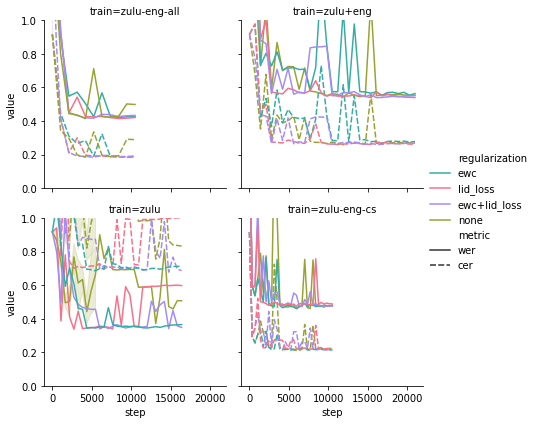

In [ ]:
g = sb.FacetGrid(
    df[
        # (df['experiment_name'].str.contains('zulu')) &
        # ~(df['experiment_name'].str.contains('zulu-swahili-eng')) &
        (~df['experiment_name'].str.contains('tira')) &
        # (df['lang_prompt']=='swahili') &
        # (df['lang_prompt']=='croatian')&
        # (df['dataset'].isin(['fl_en', 'tira-clean-split', 'sasoc-cs', 'nchlt_zul'])) &
        (df['dataset'].isin(['tira-clean-split', 'sasoc-cs', 'tira-cs'])) &
        (df['ewc_lambda'].isin([0,1])) &
        (df['lid_loss_alpha'].isin([0,0.2])) &
        # (df['regularization']=='none')&
        # (df['tag'].str.contains('loss'))
        # (df['tag']=='train/loss')
        (df['metric']!='')
        # (df['LoRA'])
    ],
    # col='ewc_lambda',
    col='train_data',
    # col_wrap=2,
    row='beam',
    # col='lid_loss_alpha',
    # row='dataset',
    # sharey=False,
)
palette_map= {
    key: color for key, color in
    zip(['lid_loss', 'none', 'ewc', 'ewc+lid_loss'], sb.color_palette('husl',4))
}
g.map_dataframe(
    sb.lineplot,
    # x='epoch',
    x='step',
    y='value',
    # y='loss_diff',
    # hue='lid_loss_alpha',
    hue='regularization',
    palette=palette_map,
    # hue='ewc_lambda',
    # errorbar=None,
    legend='full',
    style='metric',
    # style='tag',
)
# g.set_titles('eval={row_name}, train={col_name}')
g.set_titles('train={col_name}')
g.add_legend()
# g.set_title('Performance on English while decoding as Yoruba')
g.set(ylim=(0,1))
# g.set(xlim=(0,10))
plt.show()

In [17]:
df.sort_values('date', ascending=False)

,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,epoch,metric,dataset,ewc,lid_loss,regularization,train_data,loss_diff
2763,2415,eval/tira_eval-en+sw_loss,1.969906,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-10 07:07:29,0.2,False,-1,False,NaN,NaN,1.0,1,,tira-cs,True,True,ewc+lid_loss,tira-eng,0.045944
2773,1000,train/epoch,0.414079,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-10 07:07:29,0.2,False,-1,False,NaN,NaN,1.0,0,,None,True,True,ewc+lid_loss,tira-eng,NaN
2782,1000,train/learning_rate,0.000010,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-10 07:07:29,0.2,False,-1,False,NaN,NaN,1.0,0,,None,True,True,ewc+lid_loss,tira-eng,NaN
2789,4000,train/loss,0.143100,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-10 07:07:29,0.2,False,-1,False,NaN,NaN,1.0,1,,None,True,True,ewc+lid_loss,tira-eng,-0.052600
2786,1000,train/loss,0.562400,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-10 07:07:29,0.2,False,-1,False,NaN,NaN,1.0,0,,None,True,True,ewc+lid_loss,tira-eng,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11784,0,train/epoch,0.000000,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,,None,True,True,ewc+lid_loss,zulu,NaN
11779,0,eval/fl_en-en_loss,0.796759,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,,fl_en,True,True,ewc+lid_loss,zulu,0.000000
11778,0,eval/fl_en-en_cer,0.073465,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,cer,fl_en,True,True,ewc+lid_loss,zulu,NaN
11783,0,eval/fl_en-en_wer,0.273285,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,1900-01-24 14:43:02,0.2,False,swahili,False,NaN,NaN,1.0,0,wer,fl_en,True,True,ewc+lid_loss,zulu,NaN


In [18]:
df.loc[
    ~(df['experiment_name'].str.contains('tira')) &
    # (df['dataset'].isin(['fl_en', 'tira-clean-split', 'sasoc-cs', 'nchlt_zul'])) &
    (df['dataset']=='sasoc-cs') &
    (df['ewc_lambda'].isin([1])) &
    (df['lid_loss_alpha'].isin([0.2])) &
    # (df['regularization']=='none')&
    # (df['epoch']>20)&
    # (df['epoch']>25)&
    (df['metric']=='wer'),
    ['epoch', 'step', 'value', 'experiment_name', 'lang_prompt', 'tag']
].sort_values('value')

,epoch,step,value,experiment_name,lang_prompt,tag
3773,5,5240,0.416986,whisper-small-zulu-eng-all-lid-alpha-0.2-ewc-l...,-1,eval/wer
3772,4,4192,0.418902,whisper-small-zulu-eng-all-lid-alpha-0.2-ewc-l...,-1,eval/wer
3776,8,8384,0.426564,whisper-small-zulu-eng-all-lid-alpha-0.2-ewc-l...,-1,eval/wer
3777,9,9432,0.431673,whisper-small-zulu-eng-all-lid-alpha-0.2-ewc-l...,-1,eval/wer
3771,3,3144,0.432950,whisper-small-zulu-eng-all-lid-alpha-0.2-ewc-l...,-1,eval/wer
...,...,...,...,...,...,...
3768,0,0,1.492337,whisper-small-zulu-eng-all-lid-alpha-0.2-ewc-l...,-1,eval/wer
10060,1,699,1.536398,whisper-small-zulu-swahili-eng-lid-alpha-0.2-e...,swahili,eval/sasoc-cs-en+sw_wer
3867,1,502,1.729246,whisper-small-zulu-eng-all-lid-alpha-0.2-ewc-l...,-1,eval/wer
11734,3,1638,1.925926,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,swahili,eval/sasoc-cs-en+sw_wer
